## EDA Smart City

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()

## Traffic information

In [2]:
numeric_cols = ['vehicle_count', 'avg_speed',  'avg_measured_time', 'median_measured_time']

traffic_df = pd.read_csv("../data/aarhus_traffic_data_aug_nov_2014.csv")
traffic_df.head()

,Unnamed: 0,status,avg_measured_time,avg_speed,ext_id,median_measured_time,timestamp,vehicle_count,_id,report_id
0,0,OK,74,50,668,74,2014-08-01T07:50:00,5,20746220,158324
1,1,OK,73,50,668,73,2014-08-01T07:55:00,6,20746392,158324
2,2,OK,61,60,668,61,2014-08-01T08:00:00,4,20746723,158324
3,3,OK,61,60,668,61,2014-08-01T08:05:00,1,20747172,158324
4,4,OK,63,58,668,63,2014-08-01T08:10:00,3,20747545,158324


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

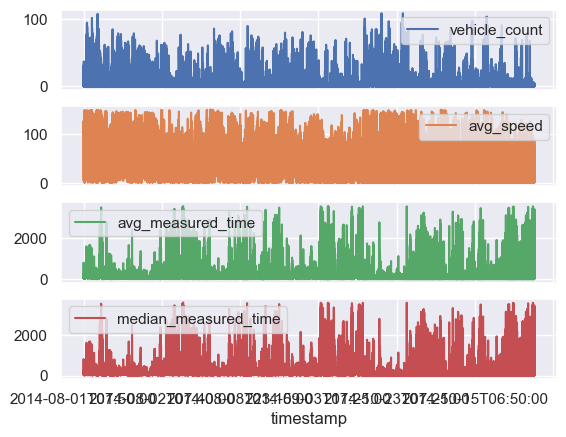

In [14]:

traffic_df.plot('timestamp', numeric_cols, subplots=True)

In [3]:

#compute your moving average here
window_size = 10*24*60 #minutes
# x days * 24 hours/day * 60 minutes/hour
# Compute the rolling mean for each column
df_rolling = traffic_df.set_index('timestamp')[numeric_cols].rolling(window=window_size, min_periods=1).mean().reset_index()

# Reshape for seaborn
long_df_rolling = df_rolling.melt(id_vars='timestamp', var_name='Variable', value_name='Value')

In [4]:
# Plotting using seaborn (faster to plot)
plt.figure(figsize=(15, 5))
sns.lineplot(data=long_df_rolling, x='timestamp', y='Value', hue='Variable')
plt.title('Moving Average')
plt.xlabel('Datetime')
plt.ylabel('Moving Average')
plt.legend(title='Variable', loc='upper right')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Cleaning Dataset by inserting the median value from the series
#clean up missing data here
median_values = traffic_df[traffic_df.columns[1:-1]].median()

for col, variable in median_values.items():
    traffic_df.fillna({col: variable}, inplace=True)
    
traffic_df.describe()

,dewptm,pressurem,wdird,tempm,vism,wspdm,hum
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16414.000000
mean,4.226830,1013.638896,182.501824,9.059231,-390.022616,11.948820,71.157914
std,3.975966,9.504202,89.231576,4.826267,1968.087159,110.745522,16.131804
min,-9.000000,986.000000,0.000000,-3.000000,-9999.000000,-9999.000000,12.000000
25%,2.000000,1007.000000,110.000000,5.000000,8.000000,7.400000,61.000000
50%,3.000000,1014.000000,190.000000,8.000000,10.000000,11.100000,75.000000
75%,7.000000,1020.000000,260.000000,12.000000,10.000000,18.500000,84.000000
max,15.000000,1038.000000,360.000000,25.000000,50.000000,64.800000,100.000000
